**This is a relatively efficient unzip and resize pre-processing program that can be run by Colab. You may need to change the paths to yours. By the program, we can resize Jacob's pre-processed grayscale MNIST-style $28\times15$ SVHN images to $28\times28$ and save them into .h5 for convenience to reload**

In [10]:
!mv /content/drive/MyDrive/cf/extra_images_MNIST_grayscale.zip /content                 #This is the core that move the zip.file from Drive to the colab machine to speed up
%cd /content

/content


In [11]:
!mv /content/drive/MyDrive/cf/test_images_MNIST_grayscale.zip /content
%cd /content

/content


In [12]:
!mv /content/drive/MyDrive/cf/training_images_MNIST_grayscale.zip /content
%cd /content

/content


In [ ]:
!unzip extra_images_MNIST_grayscale.zip -d '/content/extra'             

In [ ]:
!unzip test_images_MNIST_grayscale.zip -d '/content/test_data'

In [ ]:
!unzip training_images_MNIST_grayscale.zip -d '/content/train'

In [ ]:
import cv2                                       #To resize the images from where you unzip them and save the images in your named location.
import os

# original path
ori_path = '/content/extra/'
# path to save
save_path = '/content/Resize_extra_true_plus/'

for i in range(len(num)):
    file_name = ori_path + str(i + 1).zfill(5) + ".png"
    img = cv2.imread(file_name)
    if img is not None:  
     print(i+1)
     resize = cv2.resize(img, (28, 28))  # resize
     cv2.imwrite(save_path+str(i+1).zfill(6)+'.png',resize)  # save

cv2.waitKey(0)

In [94]:
#Modified code based on Jacob code
def read_identifies(label):                            #To read the images and transform them into a matrix.
    with open(label, 'r') as g:
        y = list(map(int, g.readlines()))
    return y

def readFile(path,label):
    # x stores photos
    x = np.zeros((len(image_dir),28,28),dtype='float32')
    # y stores labels
    y = read_identifies(label)
    for i in range(len(y)):
        file_name = path + str(i + 1).zfill(6) + ".png"
        img = cv2.imread( file_name,flags=2)                   #Flags = 2 indicates that we read the images in grayscale style.
        x[i, :, :] = img
    return x,y

In [ ]:
x_test,y_test = readFile("/content/Resize_test/", "/content/drive/MyDrive/cf/test_labels_MNIST.txt")            #To obtain training set etc.

In [ ]:
x_train,y_train = readFile("/content/Resize_train/", "/content/drive/MyDrive/cf/training_labels_MNIST.txt")

In [112]:
x_extra,y_extra = readFile("/content/Resize_extra_true_plus/", "/content/drive/MyDrive/cf/extra_labels_MNIST.txt")

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(x_extra.shape)

(26032, 28, 28)
(73257, 28, 28)
(531131, 28, 28)


8

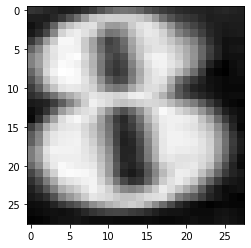

In [148]:
import matplotlib.pyplot as plt                          #To confirm we connected the right label.
plt.imshow(x_train[30051],cmap='gray')
y_train[30051]

3

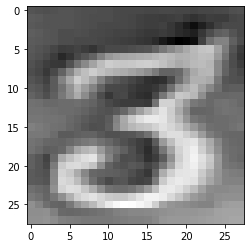

In [147]:
import matplotlib.pyplot as plt                           #To confirm we connected the right label.
plt.imshow(x_extra[400302],cmap='gray')
y_extra[400302]

In [145]:
import h5py                                      #Save the data into .h5 file
h5f = h5py.File('/content/drive/MyDrive/Resizedata_bugfixed.h5', 'w')

# Store the datasets
h5f.create_dataset('x_train', data=x_train)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('x_test', data=x_test)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('x_extra', data=x_extra)
h5f.create_dataset('y_extra', data=y_extra)

# Close the file
h5f.close()

In [146]:
# Open the file as readonly                              #Load the data from .h5 file
h5f = h5py.File('/content/drive/MyDrive/Resizedata_bugfixed.h5', 'r')

# Load the training, test and validation set
x_train = h5f['x_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['x_test'][:]
y_test = h5f['y_test'][:]
x_extra = h5f['x_extra'][:]
y_extra = h5f['y_extra'][:]
# Close this file
h5f.close()

(26032, 28, 28)
(73257, 28, 28)
(531131, 28, 28)


In [ ]:
print(x_test.shape)
print(x_train.shape)
print(x_extra.shape)